<a href="https://colab.research.google.com/github/evan15900/Lee113/blob/main/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW02 Web Crawler

## 題目

PChome 顯示卡商品與價格爬取

## 摘要

本報告透過網路爬蟲技術，收集 PChome 網站上顯示卡販賣頁面的第一頁推薦資料，為打算比較價格的消費者提供參考。

## 引言

PChome作為台灣其中一個相當重要的網路購物平台，其中包含了各式各樣的3C產品。而在網路遊戲蓬勃發展的現代，顯示卡、記憶卡、硬碟、螢幕等零件都成為是否能順暢遊玩的重要指標。

愈來愈多遊戲追求著逼真細緻的畫面表現，這使得負責圖形處理的顯示卡愈發重要。因此本次爬蟲的目標是獲取 PChome 上顯示卡推薦頁面的第一頁，分析不同店家、不同型號顯示卡的價格，為消費者根據自身需求及預算進行多方比較。

## 方法

- 目標網站描述
  - 目標網站：PChome 顯示卡。  
  https://24h.pchome.com.tw/search/?q=%E9%A1%AF%E7%A4%BA%E5%8D%A1&sortParm=rnk&sortOrder=dc
  - 頁面結構：包含商品名稱、圖片、價格等資訊。

- 工具與技術
  - 使用 Python 的 `requests` 庫發送 HTTP 請求。
  - 使用 `BeautifulSoup` 解析 HTML。
  - 使用 Python 的 `os` 模組建立儲存影像的目錄。
  - 使用 Python 的 `csv` 模組將爬取的資料寫入 CSV 檔。


In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://24h.pchome.com.tw/search/?q=%E9%A1%AF%E7%A4%BA%E5%8D%A1'
res = requests.get(url)
res.encoding = 'utf-8'
soup = BeautifulSoup(res.text, 'lxml')
soup.title

<title>顯示卡 - PChome 24h購物</title>

In [ ]:
import os
if not os.path.exists('/content/PChome'):
    os.mkdir('/content/PChome')

import csv

G_Card = [['商品','價錢']]

for gc in soup.find('div',class_='c-listInfoGrid__body').find_all('li',class_='c-listInfoGrid__item c-listInfoGrid__item--gridCardGray5 is-bottomLine'):
  t = gc.img['alt']
  src = gc.img['src'].strip()
  price = gc.find('div',class_='c-prodInfoV2__priceValue c-prodInfoV2__priceValue--m').text
  G_Card.append([t,price])
  r = requests.get(src)
  with open(f'/content/PChome/{t}.jpg', 'wb') as f:
    f.write(r.content)
with open('/content/PChome.csv', 'w', encoding='utf-8', newline='') as f:
  w = csv.writer(f)
  w.writerows(G_Card)

## 結果


- 數據存儲方式
  - 將數據存儲為 CSV 格式，方便後續分析。

In [ ]:
import csv
with open('PChome.csv', 'r') as file:
  reader = csv.reader(file)
  data = list(reader)
data

[['商品', '價錢'],
 ['技嘉 AORUS GeForce RTX 5070 WINDFORCE OC SFF 12G 顯示卡', '$21,090'],
 ['MSI GeForce RTX 5060 Ti 16G VENTUS 3X OC 顯示卡', '$17,590'],
 ['MSI VENTUS GeForce RTX 5060 8GB 2X OC 顯示卡', '$10,990'],
 ['ASUS Dual GeForce RTX 5060 8GB GDDR7 OC 顯示卡', '$10,990'],
 ['ASUS PRIME GeForce RTX 5070 12GB GDDR7 顯示卡', '$22,990'],
 ['技嘉 GeForce RTX 4070 SUPER WINDFORCE OC 12G 顯示卡', '$21,990'],
 ['MSI GAMING TRIO GeForce RTX 5060 8GB OC 顯示卡', '$12,990'],
 ['微星MSI RTX 3060 12G VENTUS 2X OC PCI-E顯示卡', '$8,990'],
 ['MSI GeForce RTX 5070 12G SHADOW 2X OC 顯示卡', '$19,990'],
 ['微星MSI GeForce RTX 5070 Ti 16G GAMING TRIO OC 顯示卡 組合', '$41,999'],
 ['ASUS PRIME GeForce RTX 4060 Ti 8GB OC 顯示卡', '$13,999'],
 ['ZOTAC GAMING GeForce RTX 5060 Ti 16GB Twin Edge OC 顯示卡', '$16,490'],
 ['MSI GeForce RTX 5070 12G VENTUS 2X OC 顯示卡', '$21,990'],
 ['MSI GeForce RTX 5060 Ti 8G GAMING TRIO OC 顯示卡', '$15,990'],
 ['技嘉 GIGABYTE GeForce RTX5070 WINDFORCE OC SFF 12G 顯示卡', '$21,090'],
 ['技嘉 GeForce RTX 5090 GAMING OC 32G 顯示卡 大

## 問題與挑戰

- 技術挑戰  
    在同一頁商品列表分成上下部分，中間被「大部分的人也搜」的區塊分隔，因此若是照著 EX02-06 練習中尋找「ul」的標籤只讀取得到上半部的商品。
    
    解決方法是尋找上一層的標籤，也就是「div」。接著再直接尋找「div」內 class 為「c-listInfoGrid__item c-listInfoGrid__item--gridCardGray5 is-bottomLine」的商品列表標籤「li」，如此就能讀取到整頁的商品並避開中間不需要的區塊了。
    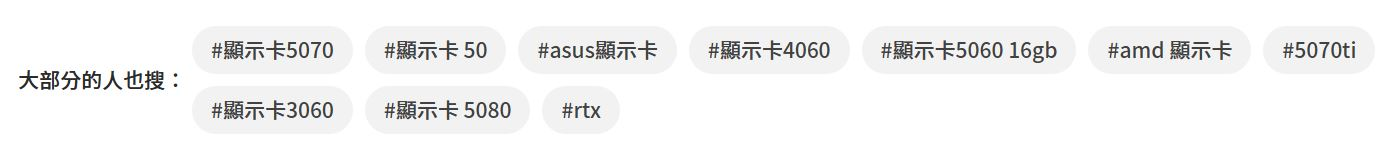

- 資料限制  
    有些可能是組合包或者有優惠，無法從商品名稱直接看出來，這可能會對消費者的選擇造成影響。

## 結論


- 成功獲取並分析了一頁 PChome 推薦的顯示卡商品，提供了多種顯示卡的價格。此外也將商品圖片下載，若有需要便可以打開查看。
- 未來期望能爬取更多資料，將範圍擴大到數頁甚至多個購物平台，讓消費者能多方比較並更了解市場行情。

## 參考文獻

* EX02-06 開眼電影